In [19]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
# ----- Matplotlib の rc 設定 ----
config = {
    "font.size":18,
    "axes.grid":True,
    "figure.figsize":[20.0, 14.0],
    "legend.fontsize": 18,
    "lines.linewidth": 3
}
plt.rcParams.update(config)


In [20]:
# データのパラメータ
N = 256            # サンプル数
dt = 0.01          # サンプリング間隔
fq1, fq2 = 5, 40    # 周波数
fc = 20            # カットオフ周波数
t = np.arange(0, N*dt, dt) # 時間軸
freq = np.linspace(0, 1.0/dt, N) # 周波数軸

# 時間信号（周波数5の正弦波 + 周波数40の正弦波）の生成
f = np.sin(2*np.pi*fq1*t) + 0.5 * np.sin(2*np.pi*fq2*t)

In [21]:
# 高速フーリエ変換（周波数信号に変換）
F = np.fft.fft(f)

In [22]:
# 正規化 + 交流成分2倍
F = F/(N/2)
F[0] = F[0]/2

# 配列Fをコピー
F2 = F.copy()

# ハイパス処理（カットオフ周波数未満の帯域と、右半分の帯域の周波数信号を0にする）
F2[(freq < fc)] = 0
F2[(freq > 1/(dt*2))] = 0

# 高速逆フーリエ変換（時間信号に戻す）
f2 = np.fft.ifft(F2)

# 振幅を元のスケールに戻す
f2 = np.real(f2*N)


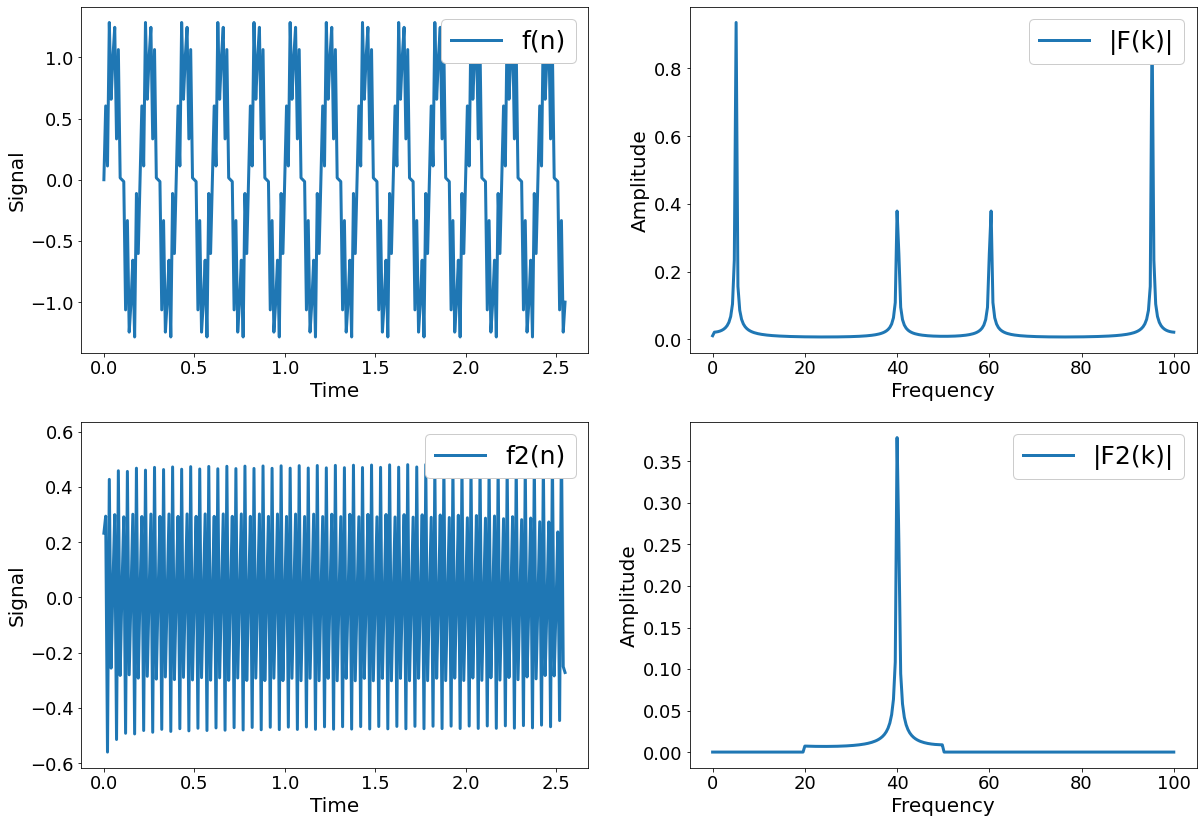

In [23]:
# 時間信号（元）
plt.subplot(221)
plt.plot(t, f, label='f(n)')
plt.xlabel("Time", fontsize=20)
plt.ylabel("Signal", fontsize=20)
plt.grid()
leg = plt.legend(loc=1, fontsize=25)
leg.get_frame().set_alpha(1)

# 周波数信号(元)
plt.subplot(222)
plt.plot(freq, np.abs(F), label='|F(k)|')
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.grid()
leg = plt.legend(loc=1, fontsize=25)
leg.get_frame().set_alpha(1)

# 時間信号(ハイパス処理後)
plt.subplot(223)
plt.plot(t, f2, label='f2(n)')
plt.xlabel("Time", fontsize=20)
plt.ylabel("Signal", fontsize=20)
plt.grid()
leg = plt.legend(loc=1, fontsize=25)
leg.get_frame().set_alpha(1)

# 周波数信号(ハイパス処理後)
plt.subplot(224)
plt.plot(freq, np.abs(F2), label='|F2(k)|')
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.grid()
leg = plt.legend(loc=1, fontsize=25)
leg.get_frame().set_alpha(1)
plt.show()